In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [2]:
#Read the data
data1 = pd.read_csv("ToyotaCorolla.csv",encoding='Latin1')
data1.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [3]:
data2=data1.iloc[:,1:]
data2

,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,Blue,...,1,1,1,0,0,0,1,0,0,0
1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,Silver,...,1,0,1,0,0,0,1,0,0,0
2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,Blue,...,0,0,1,0,0,0,1,0,0,0
3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,Black,...,0,0,1,0,0,0,1,0,0,0
4,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,Black,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,Blue,...,1,1,1,0,1,1,1,0,0,0
1432,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,Grey,...,0,0,1,0,0,1,1,0,0,0
1433,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,Blue,...,0,0,1,0,0,0,1,0,0,0
1434,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,Grey,...,0,0,0,0,0,0,1,0,0,0


In [4]:
data2['Model'].unique()

array(['TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors',
       '\xa0TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors',
       'TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors',
       '\xa0TOYOTA Corolla 2.0 D4D 90 3DR TERRA 2/3-Doors',
       'TOYOTA Corolla 2.0 D4D 90 3DR TERRA 2/3-Doors',
       '\xa0TOYOTA Corolla 1800 T SPORT VVT I 2/3-Doors',
       '\xa0TOYOTA Corolla 1.9 D HATCHB TERRA 2/3-Doors',
       'TOYOTA Corolla 1.8 VVTL-i T-Sport 3-Drs 2/3-Doors',
       'TOYOTA Corolla 1.8 16V VVTLI 3DR T SPORT BNS 2/3-Doors',
       'TOYOTA Corolla 1.8 16V VVTLI 3DR T SPORT 2/3-Doors',
       '\xa0TOYOTA Corolla 1.8 16V VVTLI 3DR T SPORT 2/3-Doors',
       '\xa0TOYOTA Corolla 1.6 VVTI Linea Terra Comfort 2/3-Doors',
       'TOYOTA Corolla 1.6 16v L.SOL 2/3-Doors',
       'TOYOTA Corolla 1.6 16V VVT I 3DR TERRA 2/3-Doors',
       '\xa0TOYOTA Corolla 1.6 16V VVT I 3DR TERRA 2/3-Doors',
       'TOYOTA Corolla 1.6 16V VVT I 3DR SOL AUT4 2/3-Doors',
       'TOYOTA Corolla 1.6 16V VVT I 3DR SOL 2

In [5]:
data3=data2.drop(['Model','Mfg_Month','Mfg_Year','Fuel_Type','Met_Color','Color','Automatic','Cylinders'], axis = 1)
data3.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,Mfr_Guarantee,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,13500,23,46986,90,2000,3,5,210,1165,0,...,1,1,1,0,0,0,1,0,0,0
1,13750,23,72937,90,2000,3,5,210,1165,0,...,1,0,1,0,0,0,1,0,0,0
2,13950,24,41711,90,2000,3,5,210,1165,1,...,0,0,1,0,0,0,1,0,0,0
3,14950,26,48000,90,2000,3,5,210,1165,1,...,0,0,1,0,0,0,1,0,0,0
4,13750,30,38500,90,2000,3,5,210,1170,1,...,1,1,1,0,1,0,1,0,0,0


In [6]:
data=data3.iloc[:,:9]
data.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [8]:
#check for missing values
data.isna().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

In [9]:
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [10]:
data.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


# Scatterplot between variables along with histograms

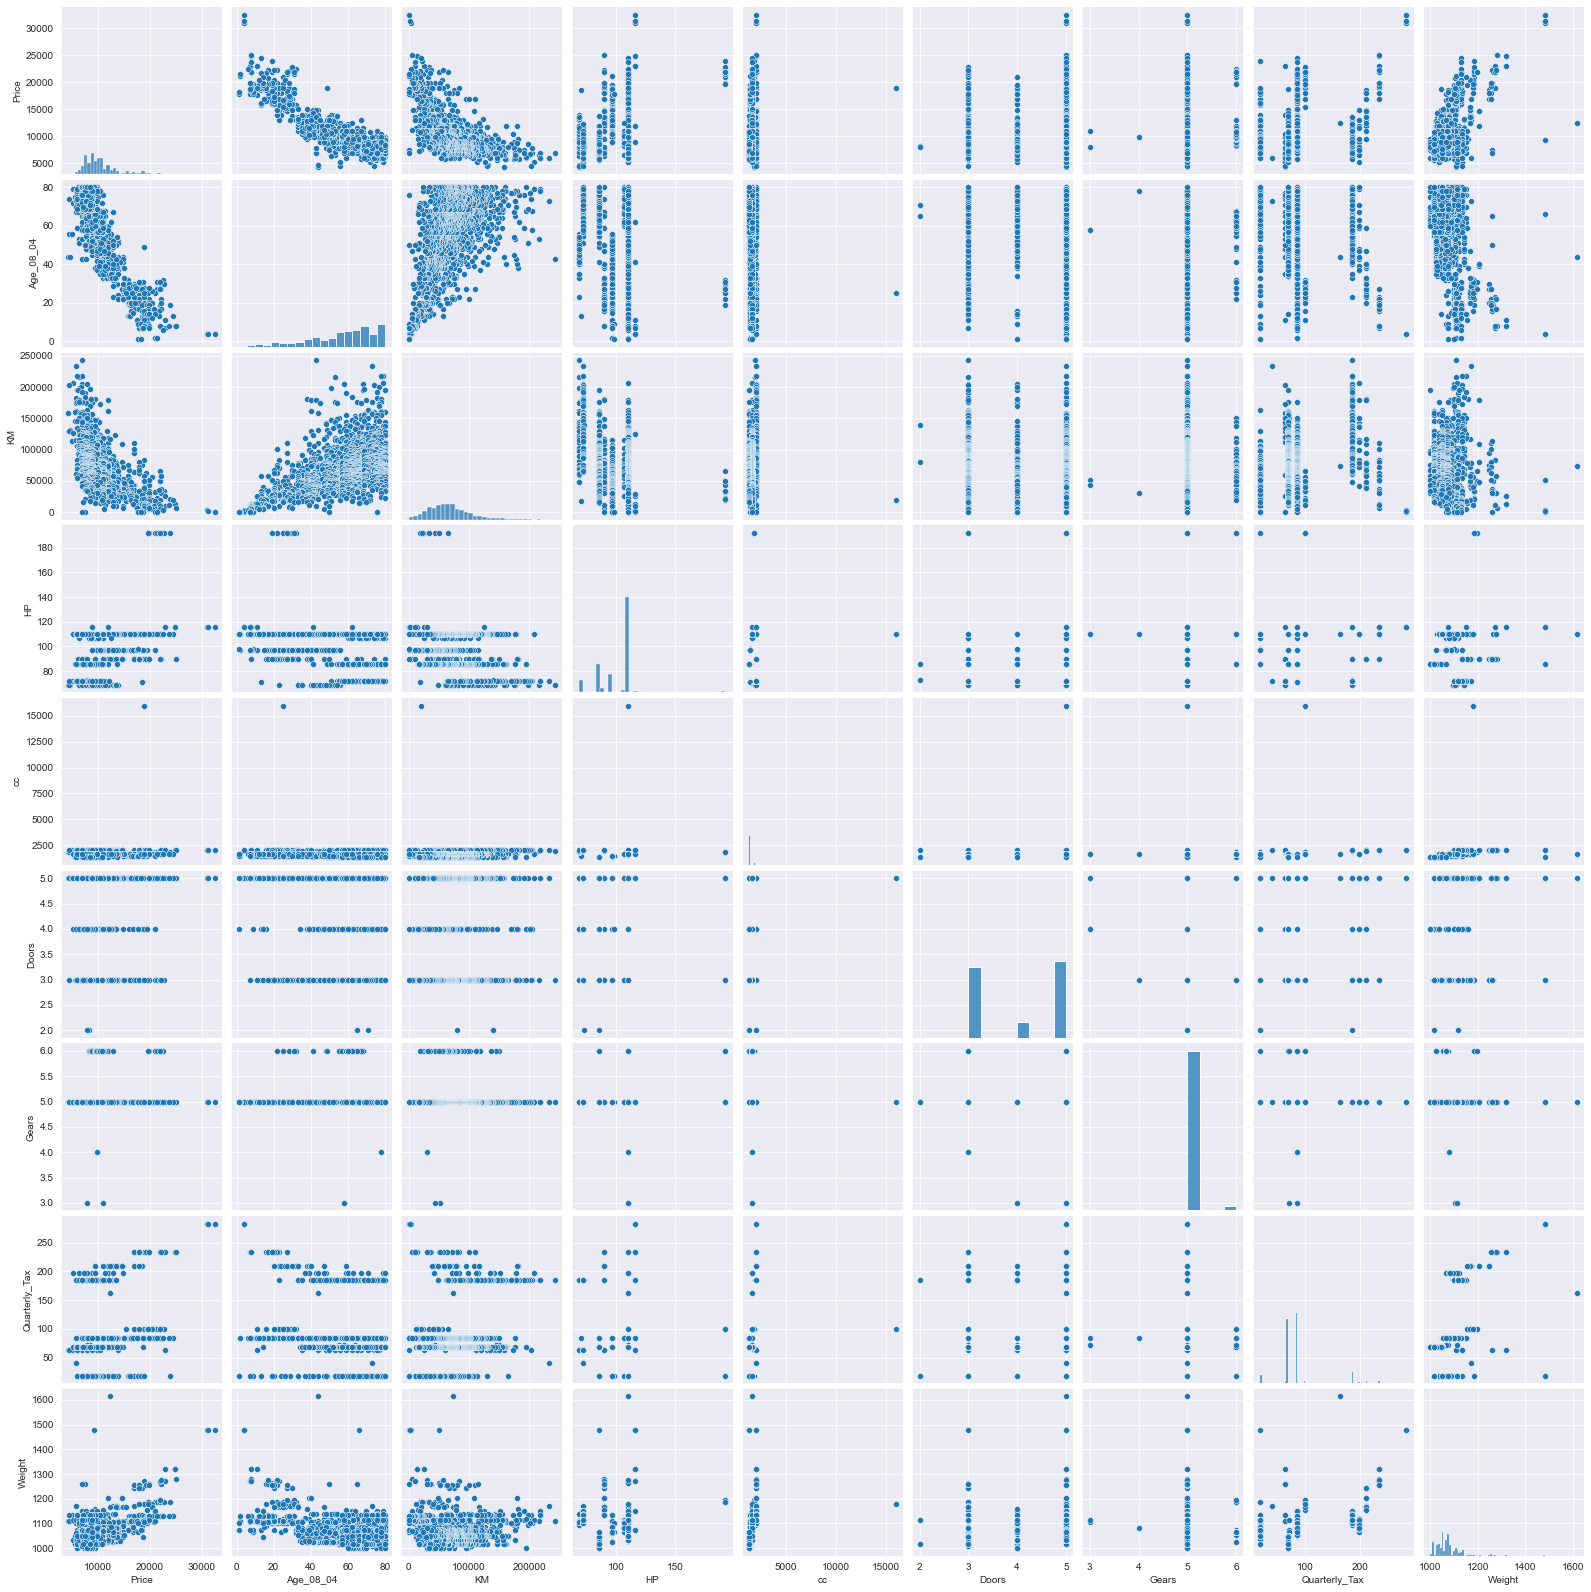

In [11]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(data)

# Preparing a model

In [12]:
#Build model
import statsmodels.formula.api as smf 
model = smf.ols('Price~KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=data).fit()

In [13]:
#Coefficients
model.params

Intercept       -29679.056985
KM                  -0.052617
HP                  26.490640
cc                  -0.170703
Doors                4.199381
Gears              750.422261
Quarterly_Tax        8.401048
Weight              34.570411
dtype: float64

In [14]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)

Intercept       -14.257755
KM              -31.623136
HP                5.932487
cc               -1.195067
Doors             0.066201
Gears             2.402018
Quarterly_Tax     4.055232
Weight           21.833731
dtype: float64 
 Intercept         3.195287e-43
KM               8.359303e-167
HP                3.738120e-09
cc                2.322594e-01
Doors             9.472273e-01
Gears             1.643195e-02
Quarterly_Tax     5.278916e-05
Weight            2.005482e-91
dtype: float64


In [15]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.6572251222965102, 0.6555448532881598)

# Calculating VIF

In [16]:
rsq_KM = smf.ols('KM~HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=data).fit().rsquared  
vif_KM = 1/(1-rsq_KM) 

rsq_HP = smf.ols('HP~KM+cc+Doors+Gears+Quarterly_Tax+Weight',data=data).fit().rsquared  
vif_HP = 1/(1-rsq_HP) 

rsq_cc = smf.ols('cc~KM+HP+Doors+Gears+Quarterly_Tax+Weight',data=data).fit().rsquared  
vif_cc = 1/(1-rsq_cc) 

rsq_Doors = smf.ols('Doors~KM+HP+cc+Gears+Quarterly_Tax+Weight',data=data).fit().rsquared  
vif_Doors = 1/(1-rsq_Doors) 

rsq_Gears = smf.ols('Gears~KM+HP+cc+Doors+Quarterly_Tax+Weight',data=data).fit().rsquared  
vif_Gears = 1/(1-rsq_Gears) 

rsq_QT = smf.ols('Quarterly_Tax~KM+HP+cc+Doors+Gears+Weight',data=data).fit().rsquared  
vif_QT = 1/(1-rsq_QT) 

rsq_WT = smf.ols('Weight~KM+HP+cc+Doors+Gears+Quarterly_Tax',data=data).fit().rsquared  
vif_WT = 1/(1-rsq_WT) 

# Storing vif values in a data frame
d1 = {'Variables':['KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight'],'VIF':[vif_KM,vif_HP,vif_cc,vif_Doors,vif_Gears,vif_QT,vif_WT]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,KM,1.233340
1,HP,1.417197
2,cc,1.163731
3,Doors,1.156564
4,Gears,1.098404
5,Quarterly_Tax,2.299091
6,Weight,2.200068


# Residual Analysis

# Test for Normality of Residuals (Q-Q Plot)

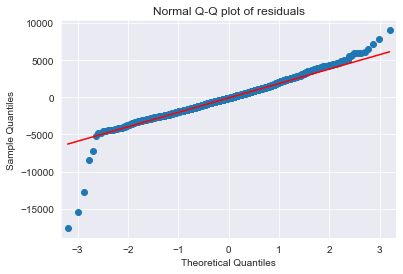

In [17]:
import statsmodels.api as sm;
qqplot=sm.qqplot(model.resid,line='q') # To draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

# Residual Plot for Homoscedasticity

In [18]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

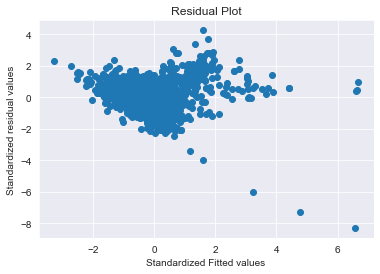

In [19]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

# Residual Vs Regressors

In [20]:
import statsmodels.api as sm

eval_env: 1


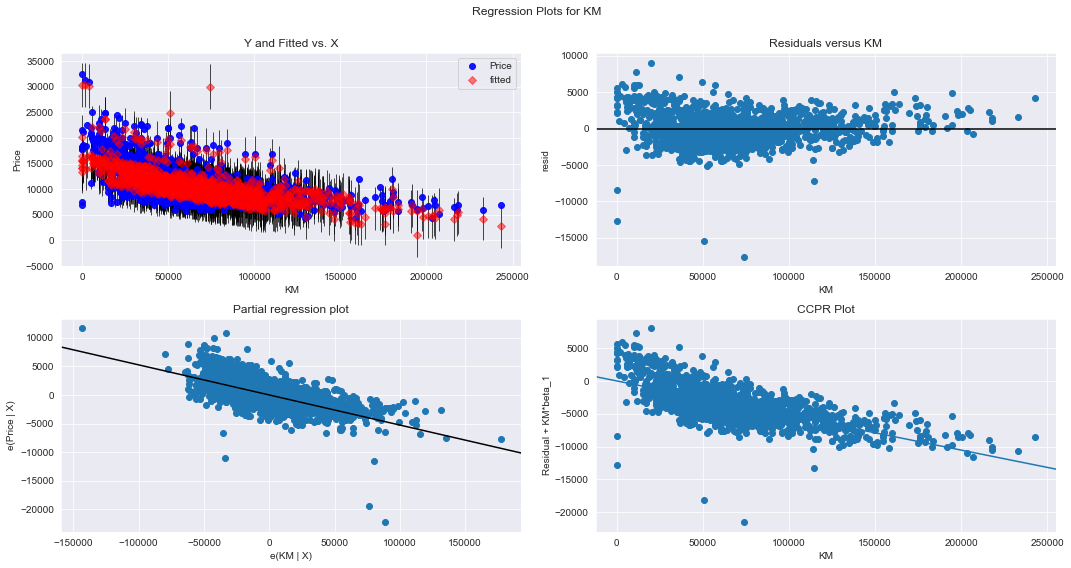

In [21]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "KM", fig=fig)
plt.show()

eval_env: 1


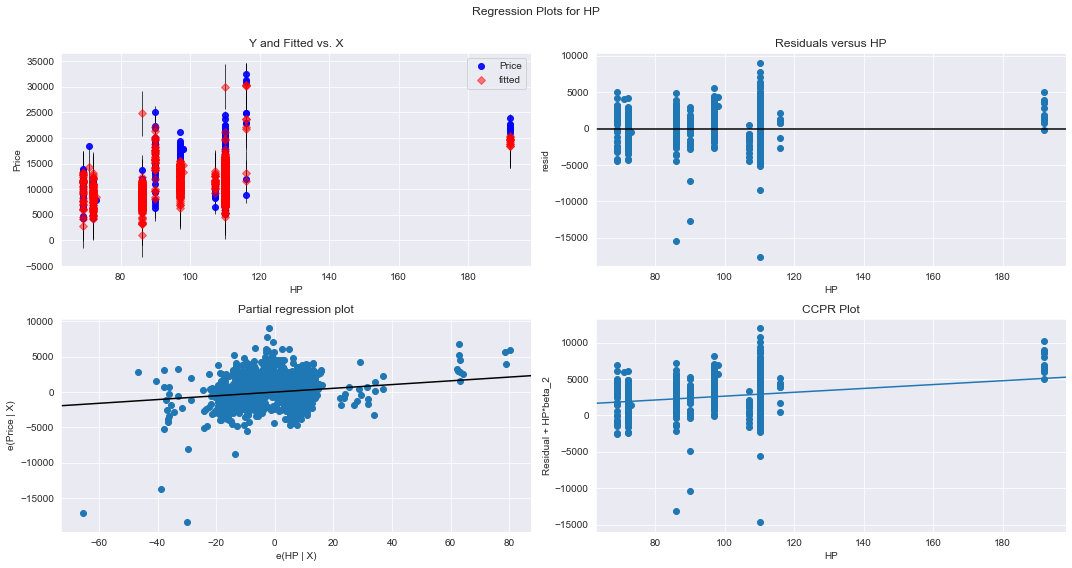

In [22]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "HP", fig=fig)
plt.show()

eval_env: 1


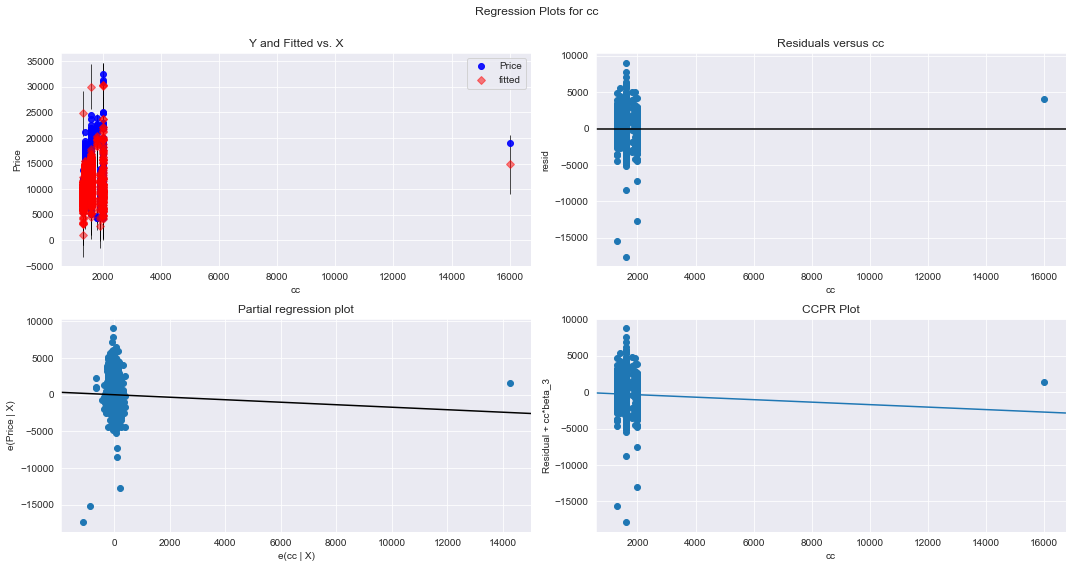

In [23]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "cc", fig=fig)
plt.show()

eval_env: 1


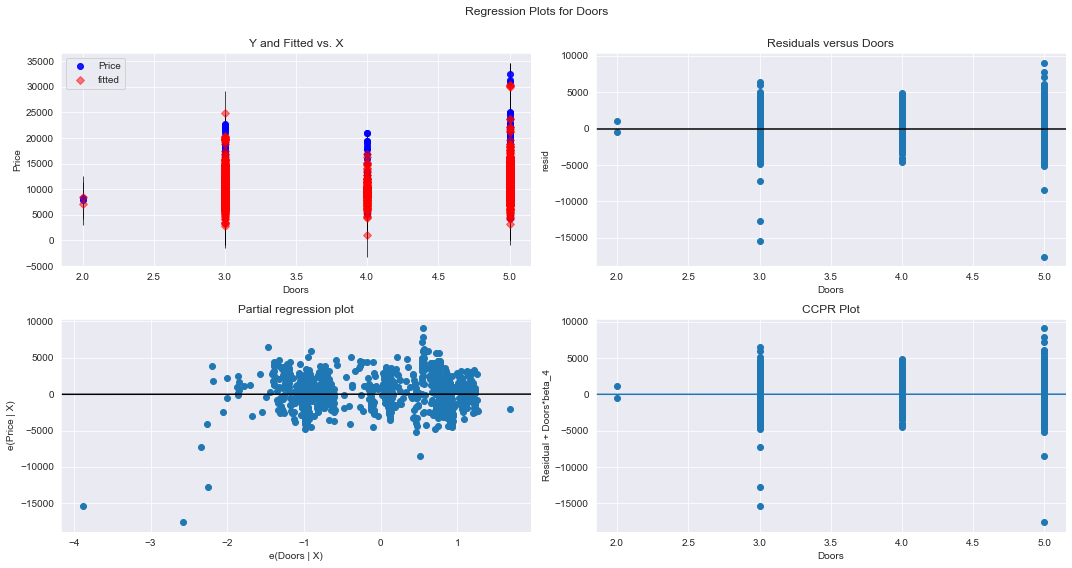

In [24]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Doors", fig=fig)
plt.show()

eval_env: 1


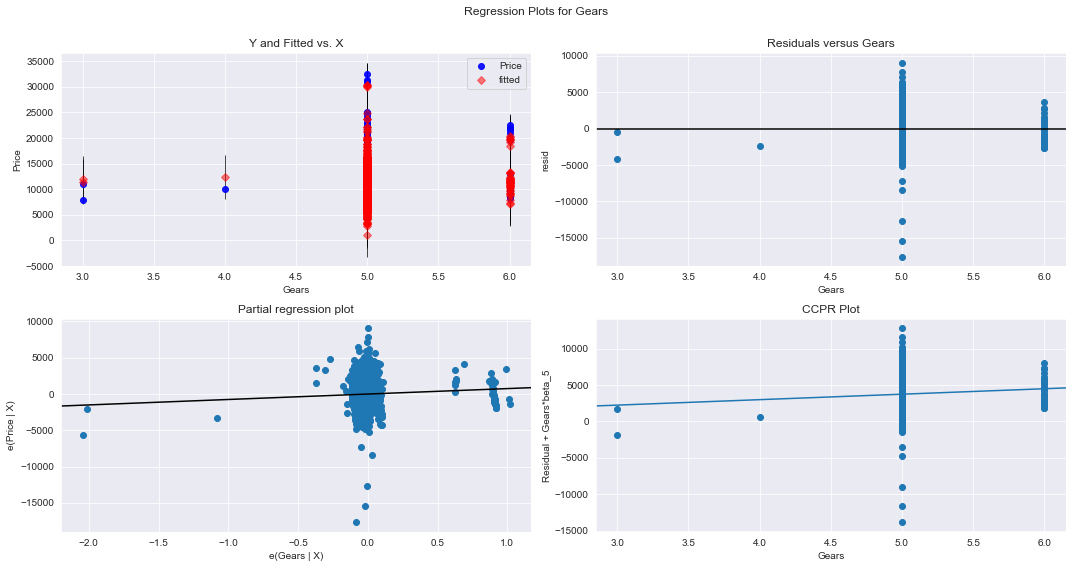

In [25]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Gears", fig=fig)
plt.show()

eval_env: 1


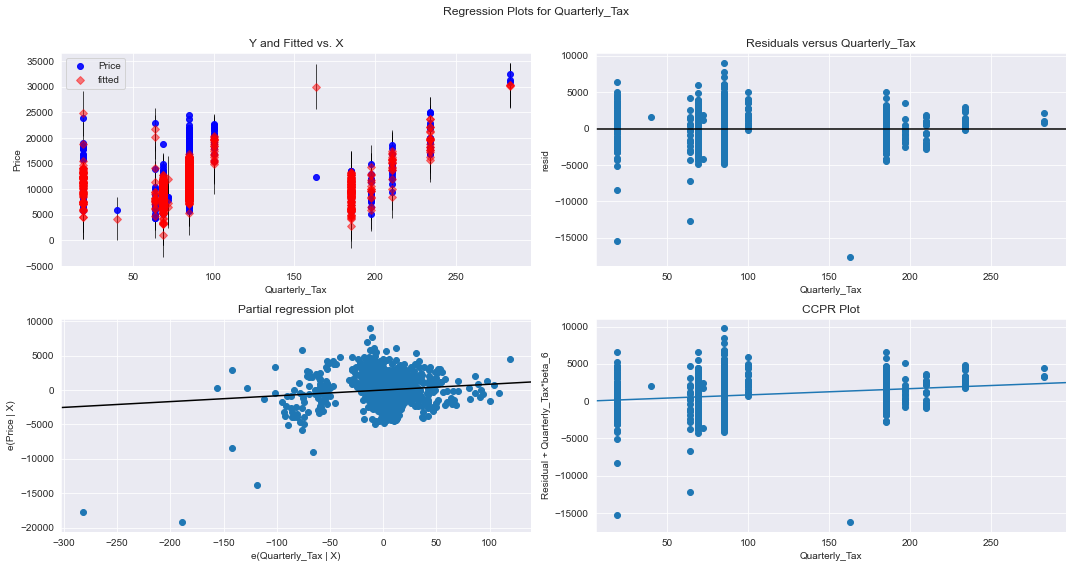

In [26]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Quarterly_Tax", fig=fig)
plt.show()

eval_env: 1


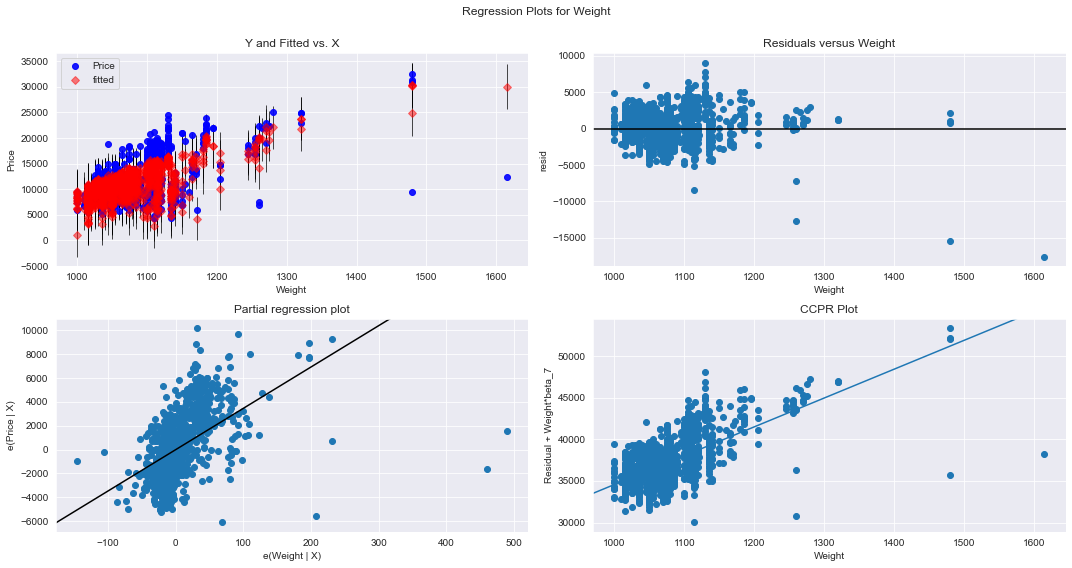

In [27]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Weight", fig=fig)
plt.show()

# Model Deletion Diagnostics

# Detecting Influencers/Outliers

# Cook’s Distance

In [28]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

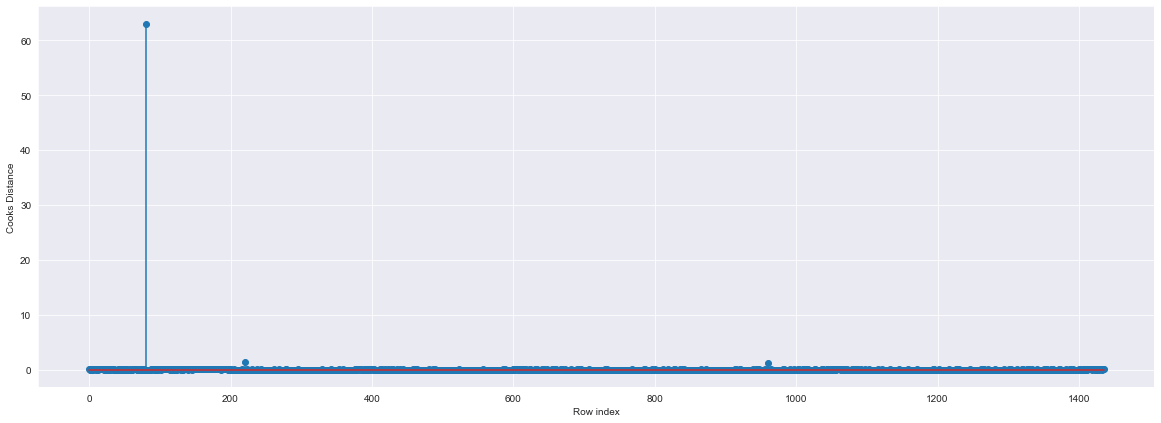

In [29]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [30]:
#index and value of influencer where c is more than others
(np.argmax(c),np.max(c))

(80, 63.04960717437973)

# High Influence points

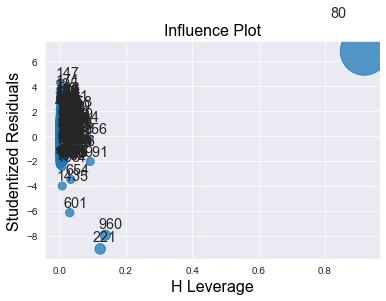

In [31]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [32]:
k = data.shape[1]
n = data.shape[0]
leverage_cutoff = 3*((k + 1)/n)

From the above plot, it is evident that data point 48 and 49 are the influencers

In [33]:
data[data.index.isin([80])]

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
80,18950,25,20019,110,16000,5,5,100,1180


In [34]:
#See the differences in HP and other variable values
data.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


# Improving the model

In [35]:
#Discard the data points which are influencers and reasign the row number (reset_index())
df=data.drop(data.index[[80]],axis=0).reset_index()

In [36]:
#Drop the original index
df=df.drop(['index'],axis=1)

In [37]:
df

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


# Build Model

In [38]:
#Regenerate R-Squared and AIC values
final_price= smf.ols('Price~KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data = df).fit()

In [39]:
(final_price.rsquared,final_price.aic)

(0.6668520116587011, 26028.853119812706)

In [40]:
#Coefficients
final_price.params

Intercept       -30309.050451
KM                  -0.048246
HP                  36.764372
cc                  -3.369407
Doors              -29.975768
Gears              654.667704
Quarterly_Tax       15.125544
Weight              38.607923
dtype: float64

In [41]:
#t and p-Values
print(final_price.tvalues, '\n', final_price.pvalues)

Intercept       -14.775609
KM              -27.429496
HP                7.911757
cc               -6.881350
Doors            -0.478483
Gears             2.126436
Quarterly_Tax     6.677188
Weight           23.155346
dtype: float64 
 Intercept         4.450312e-46
KM               2.169488e-133
HP                5.051187e-15
cc                8.849430e-12
Doors             6.323799e-01
Gears             3.363822e-02
Quarterly_Tax     3.478614e-11
Weight           5.777023e-101
dtype: float64


In [42]:
#R squared values
(final_price.rsquared,final_price.rsquared_adj)

(0.6668520116587011, 0.665217788870762)

# Cook’s Distance

In [43]:
model_influence_p = final_price.get_influence()
(c_h, _) = model_influence_p.cooks_distance

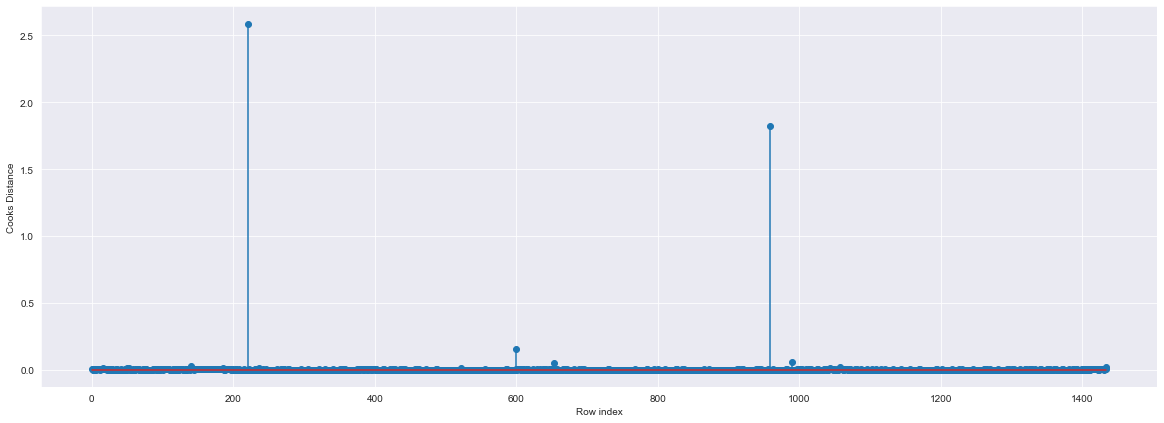

In [44]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(df)),np.round(c_h,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [45]:
#index of the data points where c is more than .5
(np.argmax(c_h),np.max(c_h))

(220, 2.589125070786913)

# High Influence points

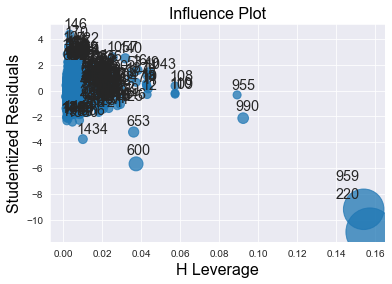

In [46]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(final_price)
plt.show()

In [47]:
k1 = df.shape[1]
n1 = df.shape[0]
leverage_cutoff1 = 3*((k1 + 1)/n1)
leverage_cutoff1

0.020905923344947737

In [48]:
#Drop observations
df1=df.drop(df.index[[220,955,959,990]],axis=0)

In [49]:
df1

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [50]:
#Reset the index and re arrange the row values
df1=df1.reset_index()

In [51]:
df1=df1.drop(['index'],axis=1)

In [52]:
df1

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1426,7500,69,20544,86,1300,3,5,69,1025
1427,10845,72,19000,86,1300,3,5,69,1015
1428,8500,71,17016,86,1300,3,5,69,1015
1429,7250,70,16916,86,1300,3,5,69,1015


# Build model

In [53]:
#Build the model on the new data
final_price1= smf.ols('Price~KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data = df1).fit()

In [54]:
#Coefficients
final_price1.params

Intercept       -41128.025577
KM                  -0.042754
HP                  33.058873
cc                  -5.561471
Doors             -217.421222
Gears              198.518572
Quarterly_Tax        7.243122
Weight              55.422251
dtype: float64

In [55]:
#t and p-Values
print(final_price1.tvalues, '\n', final_price1.pvalues)

Intercept       -19.708614
KM              -26.052674
HP                7.696334
cc              -11.922388
Doors            -3.717872
Gears             0.638942
Quarterly_Tax     3.396234
Weight           30.375836
dtype: float64 
 Intercept         1.206559e-76
KM               1.148505e-122
HP                2.603134e-14
cc                2.649774e-31
Doors             2.087055e-04
Gears             5.229635e-01
Quarterly_Tax     7.020250e-04
Weight           1.216054e-156
dtype: float64


In [56]:
#R squared values
(final_price1.rsquared,final_price1.rsquared_adj)

(0.7221356409368114, 0.720768774799466)

# Cook’s Distance

In [57]:
#Again check for influencers
model_influence_p1 = final_price1.get_influence()
(c_p1, _) = model_influence_p1.cooks_distance

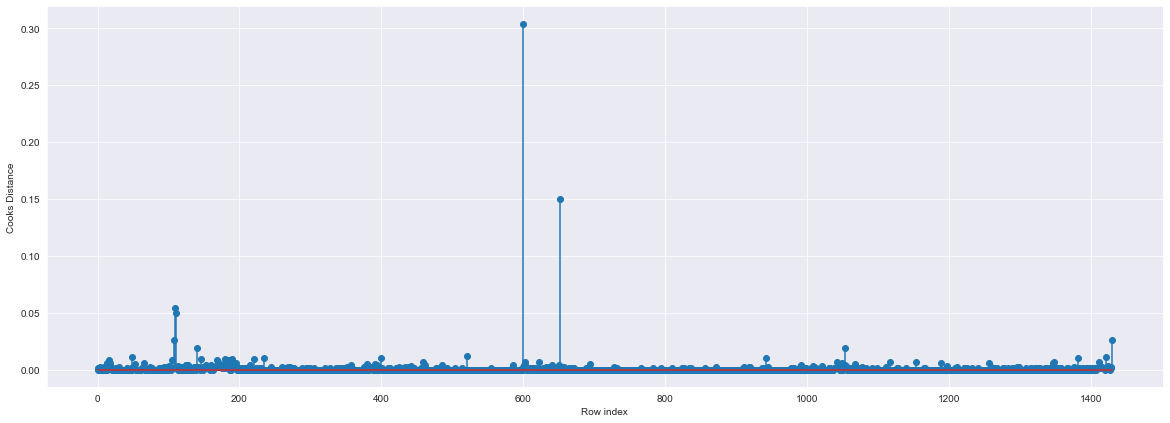

In [58]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(df1)),np.round(c_p1,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [59]:
#index of the data points where c is more than the others
(np.argmax(c_p1),np.max(c_p1))

(599, 0.3039010871999922)

# High Influence points

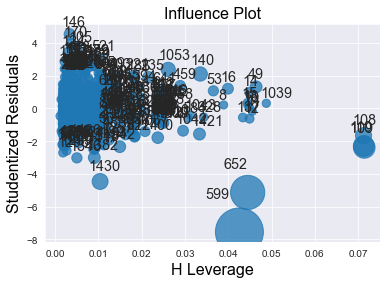

In [60]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(final_price1)
plt.show()

In [61]:
k2 = df1.shape[1]
n2 = df1.shape[0]
leverage_cutoff2 = 3*((k2 + 1)/n2)
leverage_cutoff2

0.020964360587002098

In [62]:
#Drop observations
df2=df1.drop(df1.index[[10,14,15,49,100,108,132,599,652,1039]],axis=0)

In [63]:
df2

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1426,7500,69,20544,86,1300,3,5,69,1025
1427,10845,72,19000,86,1300,3,5,69,1015
1428,8500,71,17016,86,1300,3,5,69,1015
1429,7250,70,16916,86,1300,3,5,69,1015


In [64]:
#Reset the index and re arrange the row values
df2=df2.reset_index()

In [65]:
df2=df2.drop(['index'],axis=1)

In [66]:
df2

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1416,7500,69,20544,86,1300,3,5,69,1025
1417,10845,72,19000,86,1300,3,5,69,1015
1418,8500,71,17016,86,1300,3,5,69,1015
1419,7250,70,16916,86,1300,3,5,69,1015


# Build model

In [67]:
#Build the model on the new data
final_price2= smf.ols('Price~KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data = df2).fit()

In [68]:
#Coefficients
final_price2.params

Intercept       -43826.320567
KM                  -0.042793
HP                  26.143368
cc                  -5.355424
Doors             -281.125885
Gears               60.572110
Quarterly_Tax        2.775519
Weight              59.560424
dtype: float64

In [69]:
#t and p-Values
print(final_price2.tvalues, '\n', final_price2.pvalues)

Intercept       -20.294822
KM              -26.518668
HP                5.933364
cc              -11.607458
Doors            -4.886564
Gears             0.196098
Quarterly_Tax     1.275388
Weight           31.583512
dtype: float64 
 Intercept         1.453479e-80
KM               4.258563e-126
HP                3.727448e-09
cc                8.107906e-30
Doors             1.143143e-06
Gears             8.445619e-01
Quarterly_Tax     2.023814e-01
Weight           4.289202e-166
dtype: float64


In [70]:
#R squared values
(final_price2.rsquared,final_price2.rsquared_adj)

(0.7241813023962733, 0.722814896958746)

# Cook’s Distance

In [71]:
#Again check for influencers
model_influence_p2 = final_price2.get_influence()
(c_p2, _) = model_influence_p2.cooks_distance

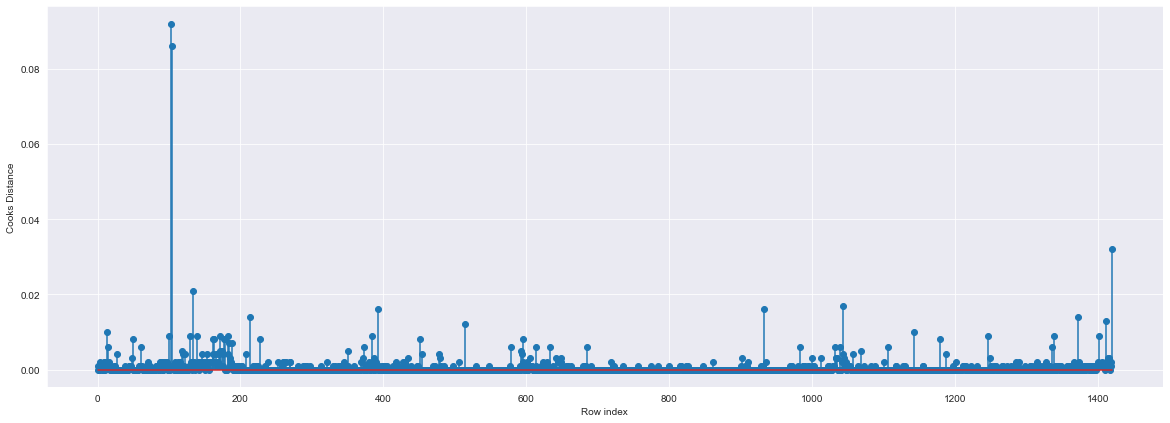

In [72]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(df2)),np.round(c_p2,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [73]:
#index of the data points where c is more than the others
(np.argmax(c_p2),np.max(c_p2))

(103, 0.09176849395121191)

# High Influence points

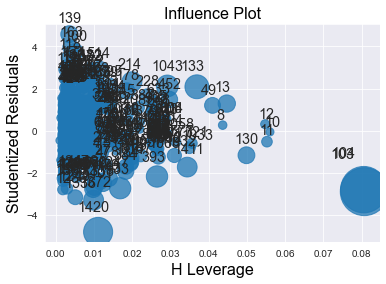

In [74]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(final_price2)
plt.show()

In [75]:
k3 = df2.shape[1]
n3 = df2.shape[0]
leverage_cutoff3 = 3*((k3 + 1)/n3)
leverage_cutoff3

0.0211118930330753

In [77]:
#Drop observations
df3=df2.drop(df2.index[[8,10,11,12,13,14,31,33,49,103,104,104,1418,1419,1420]],axis=0)

In [78]:
df3

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1413,8450,72,26000,86,1300,3,5,69,1015
1414,8950,78,24000,86,1300,5,5,85,1065
1415,8450,80,23000,86,1300,3,5,69,1015
1416,7500,69,20544,86,1300,3,5,69,1025


In [79]:
#Reset the index and re arrange the row values
df3=df3.reset_index()

In [80]:
df3=df3.drop(['index'],axis=1)

In [81]:
df3

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1402,8450,72,26000,86,1300,3,5,69,1015
1403,8950,78,24000,86,1300,5,5,85,1065
1404,8450,80,23000,86,1300,3,5,69,1015
1405,7500,69,20544,86,1300,3,5,69,1025


# Build model

In [82]:
#Build the model on the new data
final_price3= smf.ols('Price~KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data = df3).fit()

In [83]:
#Coefficients
final_price3.params

Intercept       -45973.508779
KM                  -0.043104
HP                  24.168378
cc                  -5.631839
Doors             -298.547068
Gears               84.848186
Quarterly_Tax        2.126076
Weight              62.193706
dtype: float64

In [84]:
#t and p-Values
print(final_price3.tvalues, '\n', final_price3.pvalues)

Intercept       -20.112151
KM              -26.744186
HP                4.990302
cc              -11.833880
Doors            -5.124573
Gears             0.271442
Quarterly_Tax     0.977939
Weight           30.976936
dtype: float64 
 Intercept         3.154754e-79
KM               1.306524e-127
HP                6.784966e-07
cc                7.318936e-31
Doors             3.399135e-07
Gears             7.860908e-01
Quarterly_Tax     3.282733e-01
Weight           7.167875e-161
dtype: float64


In [85]:
#R squared values
(final_price3.rsquared,final_price3.rsquared_adj)

(0.7068684778535723, 0.7054017725962278)

# Cook’s Distance

In [86]:
#Again check for influencers
model_influence_p3 = final_price3.get_influence()
(c_p3, _) = model_influence_p3.cooks_distance

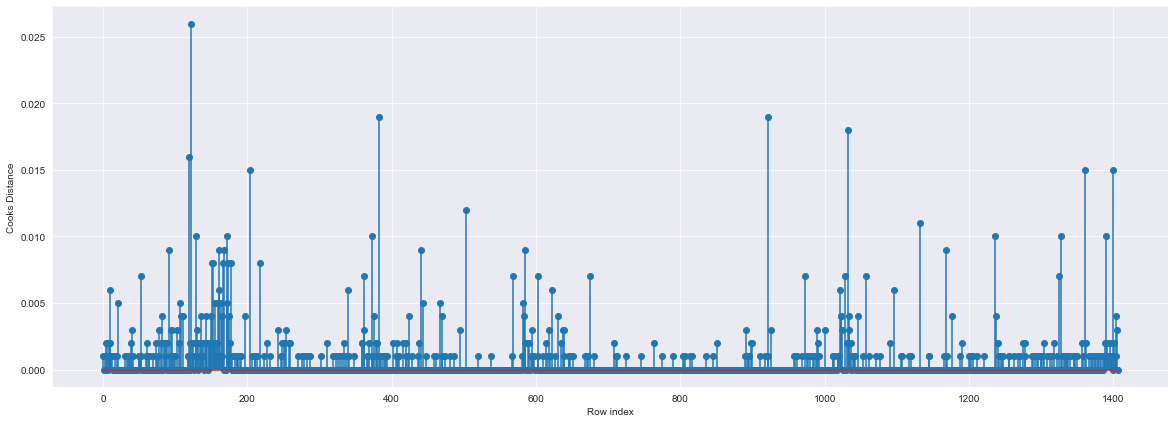

In [87]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(df3)),np.round(c_p3,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [88]:
#index of the data points where c is more than the others
(np.argmax(c_p3),np.max(c_p3))

(122, 0.026257048361738648)

# High Influence points

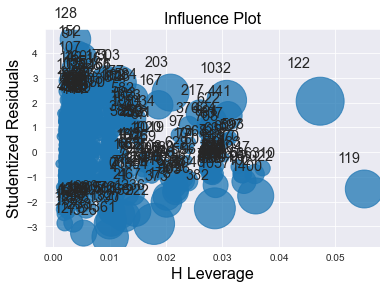

In [89]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(final_price3)
plt.show()

In [90]:
k4 = df3.shape[1]
n4 = df3.shape[0]
leverage_cutoff4 = 3*((k4 + 1)/n4)
leverage_cutoff4

0.021321961620469083

In [91]:
#Drop observations
df4=df3.drop(df3.index[[36,60,96,97,119,122,167,1032,203,217,441,376,622,1400,310,382,503]],axis=0)

In [92]:
df4

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1402,8450,72,26000,86,1300,3,5,69,1015
1403,8950,78,24000,86,1300,5,5,85,1065
1404,8450,80,23000,86,1300,3,5,69,1015
1405,7500,69,20544,86,1300,3,5,69,1025


In [93]:
#Reset the index and re arrange the row values
df4=df4.reset_index()

In [94]:
df4=df4.drop(['index'],axis=1)

In [95]:
df4

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1385,8450,72,26000,86,1300,3,5,69,1015
1386,8950,78,24000,86,1300,5,5,85,1065
1387,8450,80,23000,86,1300,3,5,69,1015
1388,7500,69,20544,86,1300,3,5,69,1025


# Build model

In [96]:
#Build the model on the new data
final_price4= smf.ols('Price~KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data = df4).fit()

In [97]:
#Coefficients
final_price4.params

Intercept       -44598.596250
KM                  -0.043789
HP                  23.515499
cc                  -5.559763
Doors             -290.965909
Gears             -103.174820
Quarterly_Tax        2.180969
Weight              61.743363
dtype: float64

In [98]:
#t and p-Values
print(final_price4.tvalues, '\n', final_price4.pvalues)

Intercept       -18.692181
KM              -27.108722
HP                4.639171
cc              -11.462807
Doors            -4.991149
Gears            -0.313696
Quarterly_Tax     0.943474
Weight           29.801120
dtype: float64 
 Intercept         1.088355e-69
KM               3.938345e-130
HP                3.829539e-06
cc                4.007624e-29
Doors             6.765533e-07
Gears             7.537991e-01
Quarterly_Tax     3.456033e-01
Weight           3.962712e-151
dtype: float64


In [99]:
#R squared values
(final_price4.rsquared,final_price4.rsquared_adj)

(0.69981659435205, 0.6982961284768434)

# Cook’s Distance

In [100]:
#Again check for influencers
model_influence_p4 = final_price4.get_influence()
(c_p4, _) = model_influence_p4.cooks_distance

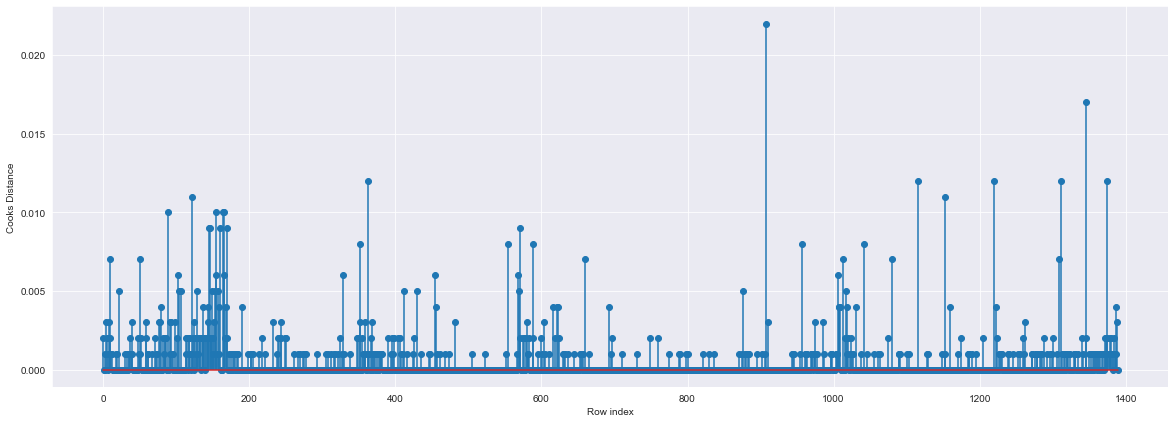

In [101]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(df4)),np.round(c_p4,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [102]:
#index of the data points where c is more than the others
(np.argmax(c_p4),np.max(c_p4))

(907, 0.021584420079960618)

# High Influence points

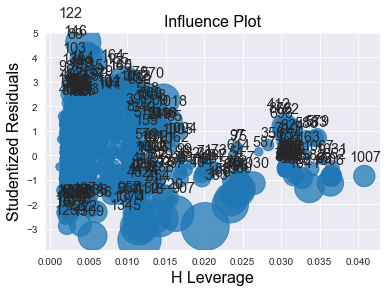

In [103]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(final_price4)
plt.show()

In [104]:
k5 = df4.shape[1]
n5 = df4.shape[0]
leverage_cutoff5 = 3*((k5 + 1)/n5)
leverage_cutoff5

0.02158273381294964

In [107]:
#Drop observations
df5=df4.drop(df3.index[[1007,1008,369,633,589,95,32,369,360,197,907,161,909,906,1382,1385]],axis=0)

In [108]:
df5

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1384,8950,71,29000,86,1300,3,5,69,1045
1386,8950,78,24000,86,1300,5,5,85,1065
1387,8450,80,23000,86,1300,3,5,69,1015
1388,7500,69,20544,86,1300,3,5,69,1025


In [109]:
#Reset the index and re arrange the row values
df5=df5.reset_index()

In [110]:
df5=df5.drop(['index'],axis=1)

In [111]:
df5

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1370,8950,71,29000,86,1300,3,5,69,1045
1371,8950,78,24000,86,1300,5,5,85,1065
1372,8450,80,23000,86,1300,3,5,69,1015
1373,7500,69,20544,86,1300,3,5,69,1025


# Build model

In [112]:
#Build the model on the new data
final_price5= smf.ols('Price~KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data = df5).fit()

In [113]:
#Coefficients
final_price5.params

Intercept       -45173.129182
KM                  -0.043657
HP                  22.725793
cc                  -5.639507
Doors             -302.228106
Gears             -110.964521
Quarterly_Tax        1.484203
Weight              62.605458
dtype: float64

In [114]:
#t and p-Values
print(final_price5.tvalues, '\n', final_price5.pvalues)

Intercept       -18.825059
KM              -26.721790
HP                4.422018
cc              -11.520114
Doors            -5.158568
Gears            -0.338284
Quarterly_Tax     0.624310
Weight           29.800454
dtype: float64 
 Intercept         1.784410e-70
KM               6.557654e-127
HP                1.055302e-05
cc                2.256906e-29
Doors             2.854831e-07
Gears             7.352008e-01
Quarterly_Tax     5.325283e-01
Weight           8.894689e-151
dtype: float64


In [115]:
#R squared values
(final_price5.rsquared,final_price5.rsquared_adj)

(0.7006734965262482, 0.6991407346211156)